In [58]:
# In this projects I will go to insights which areas are the best for start own business such as plumbing shops 
# Which  is the best to run your business?
# which area is has the probabity of cocelled projects? 
# which area has the most seggested projects? 
#which area has the most concelled projects?
#which area has the most under construction projects?
#which area has the most declared projects?
#which are has the most overdue projectS? 
#which are has the most completed projectS? 

In [59]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df=pd.read_csv('Saudi_projects_dataset.csv')

In [63]:
#I will chick the data set 

In [64]:
df.head(10)

sectors  sector_budgets  sector_num_projects  \
0   تجاري   1058790791316                  902   
1   تجاري   1058790791316                  902   
2   تجاري   1058790791316                  902   
3   تجاري   1058790791316                  902   
4   تجاري   1058790791316                  902   
5   تجاري   1058790791316                  902   
6   تجاري   1058790791316                  902   
7   تجاري   1058790791316                  902   
8   تجاري   1058790791316                  902   
9   تجاري   1058790791316                  902   

                                        name_project         type_project  \
0  برج غرفة الشرقية الاستثماري – Asharqia Chamber...                تجاري   
1  مقر برايس ووتر هاوس كوبرز – PWC Headquarter   ...          تجاري, سكني   
2  مقر المدفوعات السعودية – Saudi Payment Headqua...          تجاري, سكني   
3  الاحساء ستريب مول – Ahsa Strip Mall           ...                تجاري   
4      برج الدايل – Al-Dailh Tower                           فندقي, تجاري   
5        برج سماسكو – SMASCO Tower                            تجاري, سكني   
6     بغلف افينيو – Baghlaf Avenue                            تجاري, سكني   
7  قرية العبيكان و ماسك – Obeikan & Masic Village...  فندقي, تجاري, صناعي   
8         واحة الطائف – Taif Oasis                           فندقي, تجاري   
9  دبل تري جدة – DoubleTree Jeddah                           فندقي, تجاري   

   budget_project startday_project enddate_project      area_project  \
0    3.350000e+08       03-07-2019      31-12-2021    7,752 متر مربع   
1             NaN       01-01-2010             NaN    8,000 متر مربع   
2    1.178000e+09       01-01-2009      31-12-2014   19,500 متر مربع   
3             NaN              NaN             NaN   19,888 متر مربع   
4    1.200000e+08       01-06-2019      31-03-2022    3,651 متر مربع   
5             NaN              NaN             NaN    4,100 متر مربع   
6             NaN              NaN             NaN               NaN   
7             NaN              NaN             NaN  163,000 متر مربع   
8    5.000000e+07              NaN             NaN    7,940 متر مربع   
9             NaN              NaN             NaN    8,759 متر مربع   

              region_project     status_project  
0    المنطقة الشرقية, الدمام        تحت الإنشاء  
1       منطقة الرياض, الرياض        تحت الإنشاء  
2       منطقة الرياض, الرياض              مكتمل  
3   المنطقة الشرقية, الأحساء           معلن عنه  
4     منطقة مكة المكرمة, جدة        تحت الإنشاء  
5       منطقة الرياض, الرياض  المشاريع المقترحة  
6     منطقة مكة المكرمة, جدة  المشاريع المقترحة  
7       منطقة الرياض, الرياض  المشاريع المقترحة  
8  منطقة مكة المكرمة, الطائف  المشاريع المقترحة  
9     منطقة مكة المكرمة, جدة           معلن عنه

In [65]:
# I will handle missing data region_project and status_project since I will work on it 
#I will chick the null values
df.isnull().sum()

sectors                   0
sector_budgets            0
sector_num_projects       0
name_project              0
type_project              0
budget_project         1333
startday_project        996
enddate_project        1261
area_project            487
region_project            1
status_project            0
dtype: int64

In [66]:
 # since now intersted in sectors and region_project and status_project I will handle each coulmn contains null data 
    # anyway 


In [67]:
region_project= pd.isnull(df["region_project"]).sum() 


In [68]:
#I will work on region_project  later on the sample 

In [69]:
# now I will go through the sectors column 
sectors= pd.isnull(df["sectors"]).sum() 
sectors                   

0

In [70]:
# now I will go through the sectors status_project 
status_project= pd.isnull(df["status_project"]).sum() 
status_project

0

In [71]:
df.shape

(2182, 11)

In [72]:
# I will drop the columns with significant null values 

In [73]:
df.drop(['budget_project','startday_project','enddate_project'], axis = 1, inplace=True) 

In [74]:
df.head(5)

sectors  sector_budgets  sector_num_projects  \
0   تجاري   1058790791316                  902   
1   تجاري   1058790791316                  902   
2   تجاري   1058790791316                  902   
3   تجاري   1058790791316                  902   
4   تجاري   1058790791316                  902   

                                        name_project  type_project  \
0  برج غرفة الشرقية الاستثماري – Asharqia Chamber...         تجاري   
1  مقر برايس ووتر هاوس كوبرز – PWC Headquarter   ...   تجاري, سكني   
2  مقر المدفوعات السعودية – Saudi Payment Headqua...   تجاري, سكني   
3  الاحساء ستريب مول – Ahsa Strip Mall           ...         تجاري   
4      برج الدايل – Al-Dailh Tower                    فندقي, تجاري   

      area_project            region_project status_project  
0   7,752 متر مربع   المنطقة الشرقية, الدمام    تحت الإنشاء  
1   8,000 متر مربع      منطقة الرياض, الرياض    تحت الإنشاء  
2  19,500 متر مربع      منطقة الرياض, الرياض          مكتمل  
3  19,888 متر مربع  المنطقة الشرقية, الأحساء       معلن عنه  
4   3,651 متر مربع    منطقة مكة المكرمة, جدة    تحت الإنشاء

In [75]:
df=df.replace({'معلن عنه': 'declared_project', 'متعثر': 'Stumbled_project', 'متأخر': 'overdue_project'
    , 'تحت الإنشاء': 'Under_construction', 'المشاريع المقترحة': 'Suggested_projects', 'ملغي': 'Canceled_projects'      
                   , 'مكتمل': 'Projects_completed' ,'تجاري':'commercial',
    'صحي':'healthy' ,'تجاري':'commercial',
    'صحي':'healthy'})

In [76]:

df.head(100)

sectors  sector_budgets  sector_num_projects  \
0    تجاري   1058790791316                  902   
1    تجاري   1058790791316                  902   
2    تجاري   1058790791316                  902   
3    تجاري   1058790791316                  902   
4    تجاري   1058790791316                  902   
5    تجاري   1058790791316                  902   
6    تجاري   1058790791316                  902   
7    تجاري   1058790791316                  902   
8    تجاري   1058790791316                  902   
9    تجاري   1058790791316                  902   
10   تجاري   1058790791316                  902   
11   تجاري   1058790791316                  902   
12   تجاري   1058790791316                  902   
13   تجاري   1058790791316                  902   
14   تجاري   1058790791316                  902   
15   تجاري   1058790791316                  902   
16   تجاري   1058790791316                  902   
17   تجاري   1058790791316                  902   
18   تجاري   1058790791316                  902   
19   تجاري   1058790791316                  902   
20   تجاري   1058790791316                  902   
21   تجاري   1058790791316                  902   
22   تجاري   1058790791316                  902   
23   تجاري   1058790791316                  902   
24   تجاري   1058790791316                  902   
25   تجاري   1058790791316                  902   
26   تجاري   1058790791316                  902   
27   تجاري   1058790791316                  902   
28   تجاري   1058790791316                  902   
29   تجاري   1058790791316                  902   
..     ...             ...                  ...   
70   تجاري   1058790791316                  902   
71   تجاري   1058790791316                  902   
72   تجاري   1058790791316                  902   
73   تجاري   1058790791316                  902   
74   تجاري   1058790791316                  902   
75   تجاري   1058790791316                  902   
76   تجاري   1058790791316                  902   
77   تجاري   1058790791316                  902   
78   تجاري   1058790791316                  902   
79   تجاري   1058790791316                  902   
80   تجاري   1058790791316                  902   
81   تجاري   1058790791316                  902   
82   تجاري   1058790791316                  902   
83   تجاري   1058790791316                  902   
84   تجاري   1058790791316                  902   
85   تجاري   1058790791316                  902   
86   تجاري   1058790791316                  902   
87   تجاري   1058790791316                  902   
88   تجاري   1058790791316                  902   
89   تجاري   1058790791316                  902   
90   تجاري   1058790791316                  902   
91   تجاري   1058790791316                  902   
92   تجاري   1058790791316                  902   
93   تجاري   1058790791316                  902   
94   تجاري   1058790791316                  902   
95   تجاري   1058790791316                  902   
96   تجاري   1058790791316                  902   
97   تجاري   1058790791316                  902   
98   تجاري   1058790791316                  902   
99   تجاري   1058790791316                  902   

                                         name_project  \
0   برج غرفة الشرقية الاستثماري – Asharqia Chamber...   
1   مقر برايس ووتر هاوس كوبرز – PWC Headquarter   ...   
2   مقر المدفوعات السعودية – Saudi Payment Headqua...   
3   الاحساء ستريب مول – Ahsa Strip Mall           ...   
4       برج الدايل – Al-Dailh Tower                     
5         برج سماسكو – SMASCO Tower                     
6      بغلف افينيو – Baghlaf Avenue                     
7   قرية العبيكان و ماسك – Obeikan & Masic Village...   
8          واحة الطائف – Taif Oasis                     
9   دبل تري جدة – DoubleTree Jeddah                     
10             بوكس بارك – Box Park                     
11     النخيل بلازا – Nakheel Plaza                     
12        مركز الأبحاث – Think Tank                     
13                    كيوبيك – QBIC       

In [53]:
dfd=df['sectors']
dfd

0        تجاري
1        تجاري
2        تجاري
3        تجاري
4        تجاري
5        تجاري
6        تجاري
7        تجاري
8        تجاري
9        تجاري
10       تجاري
11       تجاري
12       تجاري
13       تجاري
14       تجاري
15       تجاري
16       تجاري
17       تجاري
18       تجاري
19       تجاري
20       تجاري
21       تجاري
22       تجاري
23       تجاري
24       تجاري
25       تجاري
26       تجاري
27       تجاري
28       تجاري
29       تجاري
         ...  
2152       صحي
2153       صحي
2154       صحي
2155       صحي
2156       صحي
2157       صحي
2158       صحي
2159       صحي
2160       صحي
2161       صحي
2162       صحي
2163       صحي
2164       صحي
2165       صحي
2166       صحي
2167       صحي
2168       صحي
2169       صحي
2170       صحي
2171       صحي
2172       صحي
2173       صحي
2174       صحي
2175       صحي
2176       صحي
2177       صحي
2178       صحي
2179       صحي
2180       صحي
2181       صحي
Name: sectors, Length: 2182, dtype: object

In [54]:
df=df.replace({'المنطقة الشرقية, الدمام': 'Eastern Province Dammam', 
                        'منطقة الرياض, الرياض': 'Riyadh region, Riyadh ',
                        'منطقة مكة المكرمة, جدة': 'Makkah Province, Jeddah',
                        
               
              
              } )
sample=df[(df.region_project=='Eastern Province Dammam')|(df.region_project=='Makkah Province, Jeddah')|(df.region_project=='Riyadh region, Riyadh ')]

In [56]:
sampleDF=pd.DataFrame(sample)
sampleDF.fillna(sampleDF.median())

sectors  sector_budgets  sector_num_projects  \
0      تجاري   1058790791316                  902   
1      تجاري   1058790791316                  902   
2      تجاري   1058790791316                  902   
4      تجاري   1058790791316                  902   
5      تجاري   1058790791316                  902   
6      تجاري   1058790791316                  902   
7      تجاري   1058790791316                  902   
9      تجاري   1058790791316                  902   
10     تجاري   1058790791316                  902   
13     تجاري   1058790791316                  902   
16     تجاري   1058790791316                  902   
17     تجاري   1058790791316                  902   
18     تجاري   1058790791316                  902   
21     تجاري   1058790791316                  902   
22     تجاري   1058790791316                  902   
24     تجاري   1058790791316                  902   
25     تجاري   1058790791316                  902   
27     تجاري   1058790791316                  902   
29     تجاري   1058790791316                  902   
30     تجاري   1058790791316                  902   
32     تجاري   1058790791316                  902   
33     تجاري   1058790791316                  902   
34     تجاري   1058790791316                  902   
35     تجاري   1058790791316                  902   
37     تجاري   1058790791316                  902   
39     تجاري   1058790791316                  902   
41     تجاري   1058790791316                  902   
42     تجاري   1058790791316                  902   
43     تجاري   1058790791316                  902   
44     تجاري   1058790791316                  902   
...      ...             ...                  ...   
2111     صحي    549859453510                  150   
2113     صحي    549859453510                  150   
2114     صحي    549859453510                  150   
2116     صحي    549859453510                  150   
2117     صحي    549859453510                  150   
2118     صحي    549859453510                  150   
2121     صحي    549859453510                  150   
2122     صحي    549859453510                  150   
2123     صحي    549859453510                  150   
2128     صحي    549859453510                  150   
2129     صحي    549859453510                  150   
2133     صحي    549859453510                  150   
2134     صحي    549859453510                  150   
2135     صحي    549859453510                  150   
2136     صحي    549859453510                  150   
2140     صحي    549859453510                  150   
2144     صحي    549859453510                  150   
2146     صحي    549859453510                  150   
2148     صحي    549859453510                  150   
2149     صحي    549859453510                  150   
2152     صحي    549859453510                  150   
2153     صحي    549859453510                  150   
2154     صحي    549859453510                  150   
2155     صحي    549859453510                  150   
2160     صحي    549859453510                  150   
2163     صحي    549859453510                  150   
2167     صحي    549859453510                  150   
2173     صحي    549859453510                  150   
2180     صحي    549859453510                  150   
2181     صحي    549859453510                  150   

                                           name_project  \
0     برج غرفة الشرقية الاستثماري – Asharqia Chamber...   
1     مقر برايس ووتر هاوس كوبرز – PWC Headquarter   ...   
2     مقر المدفوعات السعودية – Saudi Payment Headqua...   
4         برج الدايل – Al-Dailh Tower                     
5           برج سماسكو – SMASCO Tower                     
6        بغلف افينيو – Baghlaf Avenue                     
7     قرية العبيكان و ماسك – Obeikan & Masic Village...   
9     دبل تري جدة – DoubleTree Jeddah                     
10               بوكس بارك – Box Park                     
13                      كيوبيك – QBIC                     
16        مجمع مكتبي – Office Complex                     
17        

In [112]:
sampleDF.fillna(0)
sampleDF.isnull().sum()

sectors                  0
sector_budgets           0
sector_num_projects      0
name_project             0
type_project             0
area_project           240
region_project           0
status_project           0
dtype: int64

In [ ]:
# Ooh now the data are greate since the column which I'm intersted in are cleanbed ('sector,region_project and status_project ')
# Then I through this data to get insight into it 

In [113]:
sampleDF

sectors  sector_budgets  sector_num_projects  \
0      تجاري   1058790791316                  902   
1      تجاري   1058790791316                  902   
2      تجاري   1058790791316                  902   
4      تجاري   1058790791316                  902   
5      تجاري   1058790791316                  902   
6      تجاري   1058790791316                  902   
7      تجاري   1058790791316                  902   
9      تجاري   1058790791316                  902   
10     تجاري   1058790791316                  902   
13     تجاري   1058790791316                  902   
16     تجاري   1058790791316                  902   
17     تجاري   1058790791316                  902   
18     تجاري   1058790791316                  902   
21     تجاري   1058790791316                  902   
22     تجاري   1058790791316                  902   
24     تجاري   1058790791316                  902   
25     تجاري   1058790791316                  902   
27     تجاري   1058790791316                  902   
29     تجاري   1058790791316                  902   
30     تجاري   1058790791316                  902   
32     تجاري   1058790791316                  902   
33     تجاري   1058790791316                  902   
34     تجاري   1058790791316                  902   
35     تجاري   1058790791316                  902   
37     تجاري   1058790791316                  902   
39     تجاري   1058790791316                  902   
41     تجاري   1058790791316                  902   
42     تجاري   1058790791316                  902   
43     تجاري   1058790791316                  902   
44     تجاري   1058790791316                  902   
...      ...             ...                  ...   
2111     صحي    549859453510                  150   
2113     صحي    549859453510                  150   
2114     صحي    549859453510                  150   
2116     صحي    549859453510                  150   
2117     صحي    549859453510                  150   
2118     صحي    549859453510                  150   
2121     صحي    549859453510                  150   
2122     صحي    549859453510                  150   
2123     صحي    549859453510                  150   
2128     صحي    549859453510                  150   
2129     صحي    549859453510                  150   
2133     صحي    549859453510                  150   
2134     صحي    549859453510                  150   
2135     صحي    549859453510                  150   
2136     صحي    549859453510                  150   
2140     صحي    549859453510                  150   
2144     صحي    549859453510                  150   
2146     صحي    549859453510                  150   
2148     صحي    549859453510                  150   
2149     صحي    549859453510                  150   
2152     صحي    549859453510                  150   
2153     صحي    549859453510                  150   
2154     صحي    549859453510                  150   
2155     صحي    549859453510                  150   
2160     صحي    549859453510                  150   
2163     صحي    549859453510                  150   
2167     صحي    549859453510                  150   
2173     صحي    549859453510                  150   
2180     صحي    549859453510                  150   
2181     صحي    549859453510                  150   

                                           name_project  \
0     برج غرفة الشرقية الاستثماري – Asharqia Chamber...   
1     مقر برايس ووتر هاوس كوبرز – PWC Headquarter   ...   
2     مقر المدفوعات السعودية – Saudi Payment Headqua...   
4         برج الدايل – Al-Dailh Tower                     
5           برج سماسكو – SMASCO Tower                     
6        بغلف افينيو – Baghlaf Avenue                     
7     قرية العبيكان و ماسك – Obeikan & Masic Village...   
9     دبل تري جدة – DoubleTree Jeddah                     
10               بوكس بارك – Box Park                     
13                      كيوبيك – QBIC                     
16        مجمع مكتبي – Office Complex                     
17        

In [114]:
def display_bar_chart(sampleDF, column, title):

    status_vals = sampleDF[column].value_counts()
    (status_vals[:10]/sampleDF.shape[0]).plot(kind="bar");
    plt.title(title);






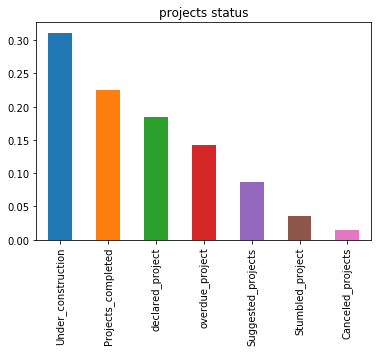

In [115]:
display_bar_chart(sampleDF, "status_project", "projects status")

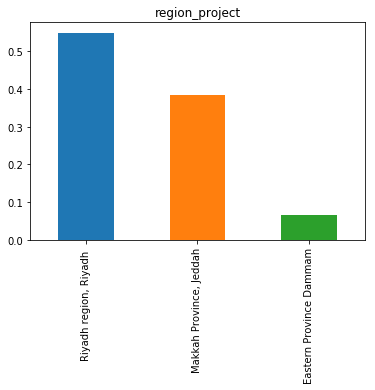

In [116]:
 display_bar_chart(sampleDF, "region_project", "region_project") 

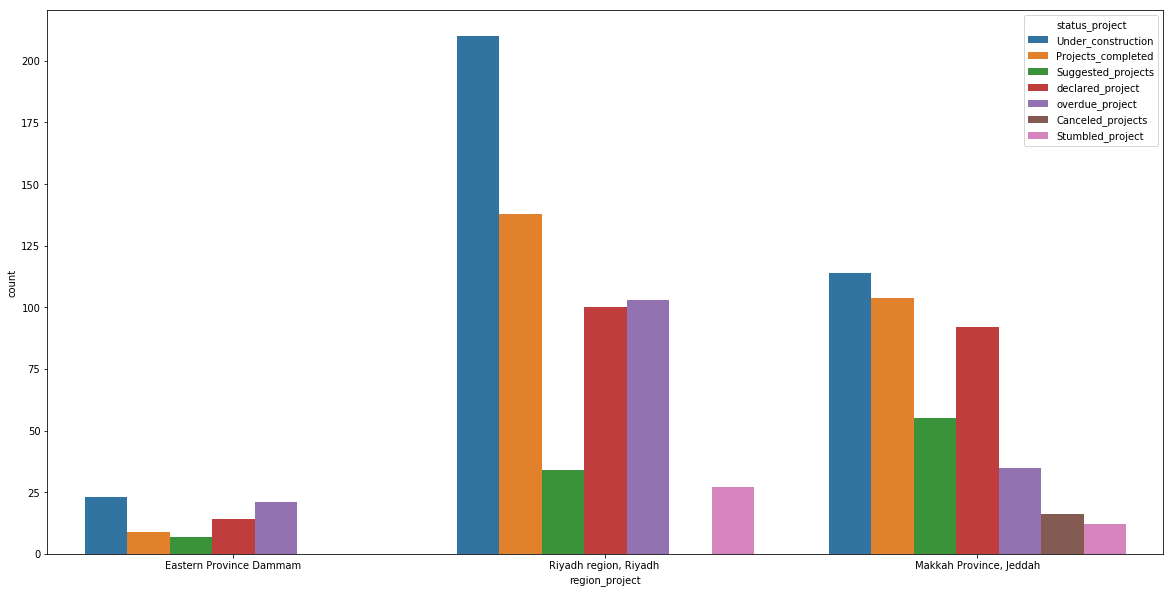

In [122]:
plt.figure(figsize = (20,10))

sb.countplot(sampleDF['region_project'],hue=sampleDF['status_project'])

In [ ]:
# The ans from the graph 



# which area has the most seggested projects? 
# the answers is Makkah Provice,Jeddah 


#which area has the most concelled projects?
# the answers is Makkah Provice,Jeddah 



#which area has the most under construction projects?
# the answers is Riyadh Provice,Riyadh 



#which area has the most declared projects?
# the answers is Riyadh Provice,Riyadh 



#which are has the most overdue projectS? 
# the answers is Riyadh Provice,Riyadh 



#which are has the most completed projectS? 
# the answers is Riyadh Provice,Riyadh 


    

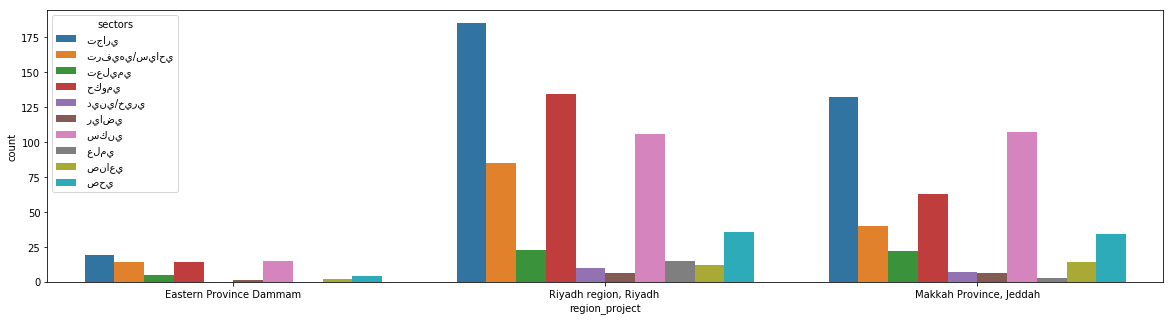

In [123]:
plt.figure(figsize = (20,5))
sb.countplot(sampleDF['region_project'],hue=sampleDF['sectors'])


In [ ]:
"my insights'
# what kinds of project's sectors is the most in the whole regions ?
#ans
# the most viral projects is commercial projects in whole sample regions

## what kinds of project's sectors is least in the whole regions ?
#the scientifc sector has the least projects in the whole sample regions except riyadh 


In [125]:
plt.figure(figsize = (25,20))
sb.countplot(sampleDF['status_project'],hue=sampleDF['sectors'])

In [ ]:
# what is the most kind of concelled project ?
# the most concelled projects is in the housing sector.